#### 读取数据

In [1]:
import pandas as pd
data=pd.read_csv("profit.csv",header=None)
x=data.iloc[:,0].values.reshape([len(data),1])
y=data.iloc[:,1]
x.shape,y.shape

((72, 1), (72,))

#### 默认超参数观察模型效果(训练集原地预测)

In [2]:
# 线性回归
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

2.041795531362243

In [3]:
# 岭回归
from sklearn.linear_model import RidgeCV
reg=RidgeCV()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

2.0417955313628258

In [4]:
# 随机梯度下降
from sklearn.linear_model import SGDRegressor
reg=SGDRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

2.9035570611678727e+36

In [5]:
# lasso回归
from sklearn.linear_model import LassoCV
reg=LassoCV()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

2.0417981100479143

In [6]:
# 弹性网络
from sklearn.linear_model import ElasticNetCV
reg=ElasticNetCV()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

2.041798501741317

In [7]:
# svm
from sklearn.svm import SVR
reg=SVR()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

2.052672613765738

In [8]:
# 决策树
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

0.0

In [9]:
# 极限树
from sklearn.tree import ExtraTreeRegressor
reg=ExtraTreeRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

0.0

In [10]:
# adaboost
from sklearn.ensemble import AdaBoostRegressor
reg=AdaBoostRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

1.1170493658120508

In [11]:
# bagging
from sklearn.ensemble import BaggingRegressor
reg=BaggingRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

0.6839588611111116

In [12]:
# 极限随机树
from sklearn.ensemble import ExtraTreesRegressor
reg=ExtraTreesRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

4.611856154345418e-27

In [13]:
# gbdt
from sklearn.ensemble import GradientBoostingRegressor
reg=GradientBoostingRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

0.23641513813267492

In [14]:
# rf
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

0.5612058573611207

In [15]:
# knn
from sklearn.neighbors import KNeighborsRegressor
reg=KNeighborsRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

1.8224366666666663

In [16]:
# xgboost
from xgboost import XGBRegressor
reg=XGBRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

0.0007233130887641973

In [17]:
# xgboost随机森林
from xgboost import XGBRFRegressor
reg=XGBRFRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

0.5833680350072815

In [18]:
# lgbm
from lightgbm import LGBMRegressor
reg=LGBMRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
mean_squared_error(y,y_pred)

1.9323431064358536

#### 可视化分析拟合情况

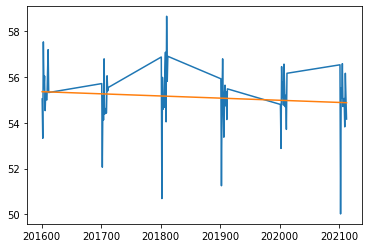

In [19]:
# 线性回归 2.
import matplotlib.pyplot as plt
reg=LinearRegression()
reg.fit(x,y)
y_pred=reg.predict(x)
plt.plot(x,y)
plt.plot(x,y_pred)
plt.show()

欠拟合严重

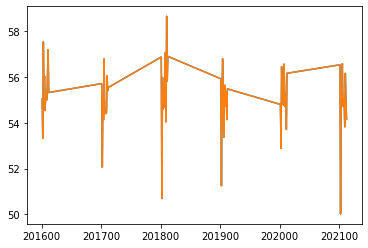

In [20]:
# 决策树 0
reg=DecisionTreeRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
plt.plot(x,y)
plt.plot(x,y_pred)
plt.show()

完全过拟合

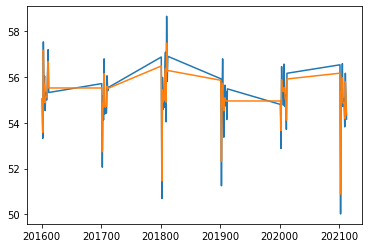

In [21]:
# gbdt 0.2
reg=GradientBoostingRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
plt.plot(x,y)
plt.plot(x,y_pred)
plt.show()

还是有点过拟合，但基本符合我们的需求

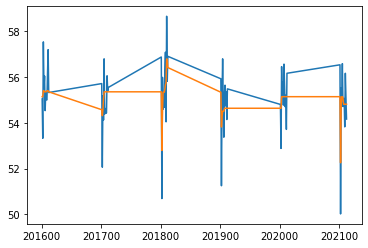

In [22]:
# adaboost 1.1
reg=AdaBoostRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
plt.plot(x,y)
plt.plot(x,y_pred)
plt.show()

还是明显欠拟合

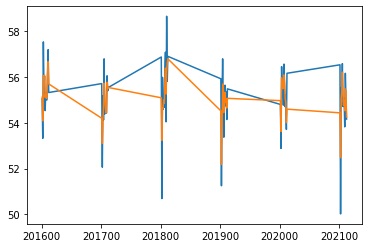

In [23]:
# bagging 0.68
reg=BaggingRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
plt.plot(x,y)
plt.plot(x,y_pred)
plt.show()

除了 202000 到 202100 偏差严重，其他看着都还不错，符合我们对预测线的需求
再看看 xgbrf

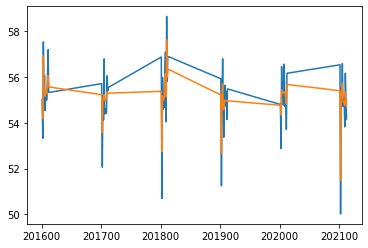

In [24]:
# xgbrf 0.58
reg=XGBRFRegressor()
reg.fit(x,y)
y_pred=reg.predict(x)
plt.plot(x,y)
plt.plot(x,y_pred)
plt.show()

尝试后发现 pmml 只能用 sklearn 包下的
做了多余工作...
所以最后使用默认超参数的 bagging